# 손글씨 숫자 이미지 분류 모델 비교

sklearn에서 load_digits() 데이터셋을 사용한 손글씨 숫자 분류 문제입니다.
- 미국의 우편번호 나누기 때 수집된 데이터
- 이미지 => 디지털화 하는 과정에 흑백은 2차원배열, 칼라는 3차원배열
- 이미지가 10장이 있고 각 이미지 크기가 8x8 (64개 특성)
- 이미지 => numpy 배열로 변환하여 처리


In [1]:
# 필요한 라이브러리 import
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# 데이터 로드 및 탐색
data = load_digits()
X = data.data
y = data.target
print(X.shape) 
print(X[:10])

# 이미지 데이터 확인
print(data.images[:10])  # numpy 2d -> 1d로 바꾸어서 data로 준거고, 원래데이터
images = data.images

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8. 

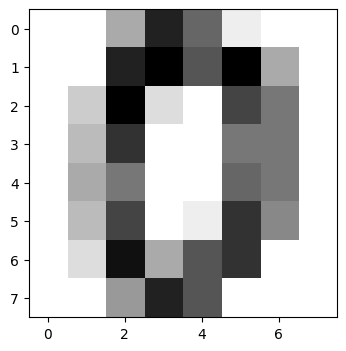

In [3]:
# 단일 이미지 출력 예시
plt.figure(figsize=(10, 4))  # 차트의 크기
plt.imshow(images[0], cmap="gray_r")  # 회색으로 이미지 출력
plt.show()

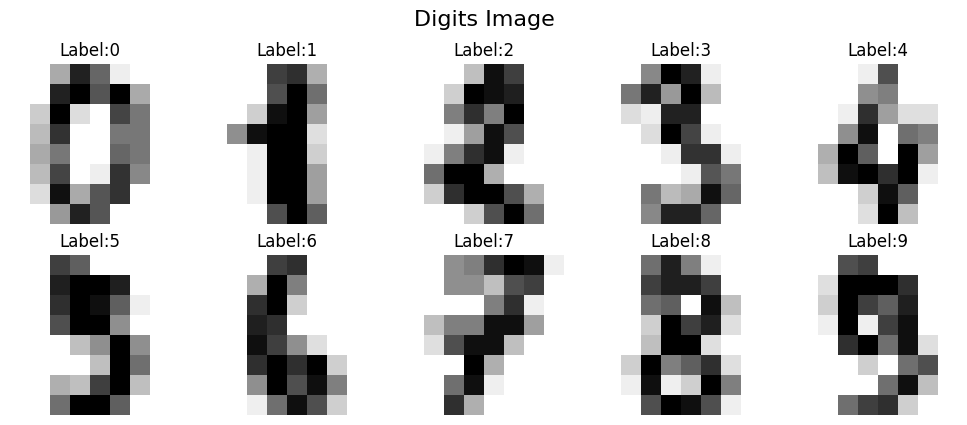

In [4]:
# 이미지 시각화 함수
def drawNumbers():
    """이미지를 여러개 출력하려면 화면 분할을 해야 한다."""
    plt.figure(figsize=(10, 4))  # 화면 전체 크기를 지정하고나서 작게 나누려면 subplot 함수를 사용한다.
    # 2 by 5 쪼개면 10개의 화면이 만들어지고 각분할위치에 번호가 붙는다 
    # 1 2 3 4 5 
    # 6 7 8 9 10 
    for i in range(10):       
        plt.subplot(2, 5, i+1)  # 내가 내보낼 위치 지정 
        plt.imshow(images[i], cmap="gray_r", interpolation='nearest')  # interpolation: 보간법 
        plt.title(f"Label:{y[i]}")
        plt.axis('off')  # 축 없애기 

    plt.tight_layout()  # 이쁘게 다시 정리해라 
    plt.suptitle("Digits Image", y=1.05, fontsize=16) 
    # y는 제목이 출력될 위치를 말하는데 y=0 이면 아래쪽 y=1 이면 위쪽  1.05 는 영역 바깥쪽에 놓으라는 의미임 
    plt.show()

# 함수 실행
drawNumbers()


In [5]:
# 데이터 분리 (훈련/테스트 세트)
# 이미지 크기 자체는 8 by 8 -> 1차원으로 바꾸니까 64개의 특성이 되었다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")


훈련 데이터 크기: (1257, 64)
테스트 데이터 크기: (540, 64)


## 1. 로지스틱 회귀 (Logistic Regression)

분류 문제에 사용하는 선형 분류 모델입니다.


In [11]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

# multi_class와 solver를 모두 기본값으로 두거나, solver만 변경
model = LogisticRegression(
    solver='lbfgs',      # 다중분류 지원
    max_iter=5000,
    random_state=0
)
model.fit(X_train, y_train)
print("로지스틱회귀")
print("훈련셋", model.score(X_train, y_train))
print("테스트셋", model.score(X_test, y_test))

로지스틱회귀
훈련셋 1.0
테스트셋 0.9685185185185186


## 2. KNN (K-Nearest Neighbors)

k개의 가장 가까운 이웃을 찾아서 다수결로 분류하는 모델입니다.


In [7]:
# KNN 이웃 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("KNN 이웃")
print("훈련셋", model.score(X_train, y_train))
print("테스트셋", model.score(X_test, y_test))


KNN 이웃
훈련셋 0.9888623707239459
테스트셋 0.9888888888888889


## 3. 의사결정트리 (Decision Tree)

트리 구조로 의사결정 규칙을 만들어 분류하는 모델입니다.


In [8]:
# 의사결정트리 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
print("DecisionTreeClassifier")
print("훈련셋", model.score(X_train, y_train))
print("테스트셋", model.score(X_test, y_test))


DecisionTreeClassifier
훈련셋 0.6865552903739062
테스트셋 0.6796296296296296


## 4. 랜덤포레스트 (Random Forest)

여러 개의 의사결정트리를 결합하여 예측하는 앙상블 모델입니다.


In [9]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=0)
model.fit(X_train, y_train)
print("RandomForestClassifier")
print("훈련셋", model.score(X_train, y_train))
print("테스트셋", model.score(X_test, y_test))


RandomForestClassifier
훈련셋 0.9387430389817024
테스트셋 0.937037037037037


## 5. 그라디언트 부스팅 (Gradient Boosting)

약한 학습기들을 순차적으로 학습하여 이전 모델의 오류를 보정하는 앙상블 모델입니다.


In [10]:
# 그라디언트 부스팅  
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=4, n_estimators=100, random_state=0, 
                                  learning_rate=0.1)
model.fit(X_train, y_train)
print("GradientBoostingClassifier")
print("훈련셋", model.score(X_train, y_train))
print("테스트셋", model.score(X_test, y_test))


GradientBoostingClassifier
훈련셋 1.0
테스트셋 0.9574074074074074


## 모델 성능 비교 요약

위의 결과를 바탕으로 각 모델의 성능을 비교해보세요:

1. **로지스틱 회귀**: 선형 분류 모델, 해석 가능성 높음
2. **KNN**: 거리 기반 분류, 계산 비용 높음
3. **의사결정트리**: 해석 가능하지만 과적합 위험
4. **랜덤포레스트**: 의사결정트리의 앙상블, 과적합 방지
5. **그라디언트 부스팅**: 순차적 학습으로 성능 향상

각 모델의 훈련셋과 테스트셋 정확도를 비교하여 과적합 여부를 확인하고, 최적의 모델을 선택해보세요.
